In [8]:
# "Price" is dependent variable,rest all is inependent variable 

In [9]:
# We here use supervised learning , and in supervised learning we need tagged 
# or labelled data set

In [76]:
# Importing necessary libraries
import pandas as pd  # Pandas for data manipulation and analysis
import numpy as np  # NumPy for numerical operations
from matplotlib import pyplot as plt  # Matplotlib for plotting
%matplotlib inline  # Magic command to display plots inline in Jupyter notebooks
import matplotlib  # Matplotlib library for customization
matplotlib.rcParams["figure.figsize"] = (20,10)  # Setting default figure size for plots


UsageError: unrecognized arguments: # Magic command to display plots inline in Jupyter notebooks


## Data Load: Load banglore home prices into a dataframe

In [13]:
# read CSV file
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [14]:
df1.shape

(13320, 9)

In [15]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [16]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [17]:
# Displaying the counts of unique values in the 'area_type' column using value_counts()
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [18]:
# print count of data sample in each of these area type categories
# by - groupby you dataframe by area type and then aggregate the count


In [19]:
# Grouping the DataFrame by 'area_type' and counting the occurrences of each group
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

#### Drop features(column) that are not required to build our model

In [20]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape 

(13320, 5)

In [21]:
df2.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

# STEP-2 Data Cleaning: Handle NA values

In [22]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [23]:
df2.shape

(13320, 5)

In [24]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [25]:
df3.shape

(13246, 5)

In [26]:
df3.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [27]:
# in size column some rows consist bathroom and some consist BHK for that
# 

In [28]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

#### Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [29]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


C:\Users\Hritik Sachan\AppData\Local\Temp\ipykernel_9116\1100308896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [30]:
 df3.head()

location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [31]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [32]:
# here 43 BHK so for checkthis 

In [33]:
df3[df3.bhk>20]

location        size total_sqft  bath  price  bhk
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43

In [34]:
# this look like error because in 2400 sqrft their is 43 bedroom is impossible
# for that error we explore total square feet feature 

### Explore total_sqft feature

In [35]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [36]:
# '1133 - 1384' some time i get range , and i want to convert this range into a single number
# so for this i can take average of these two number 

In [37]:
# first i want to know , our values in sqt feature are float or not
# so we use a function called "is flaot"

In [38]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [39]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

location       size      total_sqft  bath    price  bhk
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4

In [40]:
# now i got all value which conatains ranges like meter, perch etc
# this is an error , which we have to manage

# data may not uniform
# data may be unstructured 
# data contain outliers
# data error

In [41]:
# take range value , calculate their mean and put that value their.

### **Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple**

In [42]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [43]:
convert_sqft_to_num('2166')

2166.0

In [44]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [45]:
convert_sqft_to_num('34.46Sq. Meter') # not return anything

In [46]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head()

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

### For below row, it shows total_sqft as 2475 which is an average of the range 2100-2850

In [47]:
df4.loc[30] # before feature eng. that column value =(2100 - 2850) and now

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [48]:
(2100+2850)/2

2475.0

In [49]:
# now cleaned total sqft column
# handle NA values
# remove unneccesary features

 # STEP 3- FEATURE ENGINEERING 

### Add new feature called price per square feet, this feature is very important and this feature help us do some outlier cleaning in the  

In [50]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [51]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [52]:
df5.to_csv("bhp.csv",index=False)

### Examine locations which is a categorical variable(it just a category ,just a tax data). We need to apply dimensionality reduction technique here to reduce number of locations , because if we have too many location then it can create a problem

##### check how many location  we have

In [53]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [54]:
len(df5.location.unique())

1298

### approx 1300 location usually to handle big text data we convert it into dummy column using one hot encoding

### 1300 column in our dataframe , its too many features this is called "dimensionality curse" or " high dimesionality problem".

### " redue this dimensionality some technique"   "OTHER CATEGOTRY" when you have 1300 location you will find that , their will be many location which have only one or two datapoint

##### but how we find that datapoints

#### -- strip any extra spaces(using lambda fun()) , remove leading space or if their is sapce at the end of the location

In [55]:
df5.location = df5.location.apply(lambda x: x.strip())

#### -- LOCATION STATS VARIABLE- which will give you the statistics on  the location

In [56]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1287, dtype: int64

#### now i want to sort by number of datapoints

In [57]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

###  OTHER LOCATION

###### Whitefield lacoation has maximum number of rows in CSV file(533) , many location where 1 only one (1) datapoint so take some threshold and  OTHER LOCATION which has  less than 10 datapoint is called "OTHER LOCATION"

In [58]:
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [59]:
location_stats.values.sum()

13200

In [60]:
len(location_stats[location_stats>10])

240

In [61]:
len(location_stats)

1287

#### check how many location have less than 10 datapoint

In [62]:
len(location_stats[location_stats<=10])

1047

In [63]:
# <h2 style="color:blue">Dimensionality Reduction</h2>

# dimensionality reduction

##### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [64]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [65]:
len(df5.location.unique()) # total number of unique location

1287

In [66]:
# Applying a transformation to the 'location' column in the DataFrame df5
# The transformation uses a lambda function to categorize locations with less than 10 occurrences as 'other'
# This helps in reducing the number of unique values in the 'location' column

df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
# - The apply() function is used to apply the specified lambda function to each element in the 'location' column.
# - The lambda function checks if the location (x) is in the list 'location_stats_less_than_10'.
# - If it is, the location is replaced with 'other', otherwise, it remains unchanged.

# Calculating the new number of unique values in the 'location' column after the transformation
len(df5.location.unique())
# Explanation:
# - The len() function is used to calculate the length (number of unique values) of the 'location' column after the transformation.
# - This provides information about how many unique locations are now present in the 'location' column.


241

In [67]:
# now we have only 241 location thats looks fine
# beacause when later on when this converted into one hot encoding

# STEP 4- OUTLIER DETECTON and REMOVAL

### Outlier Removal Using Business Logic

##### As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [68]:
df5[df5.total_sqft/df5.bhk<300].head()

location       size  total_sqft  bath  price  bhk  \
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70                other  3 Bedroom       500.0   3.0  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

##### 1020. total_sqft 6 bhk this is unusual - these are clearly data error or anomalies or outlier

In [69]:
# lets see dataframe
df5.shape

(13200, 7)

In [70]:
# Filtering rows based on a condition using negation (~)
# The condition checks if the ratio of total_sqft to bhk is less than 300
# Rows that satisfy this condition are filtered out using ~ (negation)

df6 = df5[~(df5.total_sqft/df5.bhk<300)]

# Explanation:

# df5.total_sqft/df5.bhk<300: This condition calculates the ratio of total square feet to the number of bedrooms (bhk) 
# for each row in the DataFrame df5 and checks if it is less than 300.
# ~(df5.total_sqft/df5.bhk<300): The ~ operator negates the condition, so it selects rows where the ratio is NOT less 
# than 300. This filters out rows where the total square feet per bedroom is less than 300.
# df6 = df5[~(df5.total_sqft/df5.bhk<300)]: The result is a new DataFrame (df6) containing only the rows where the 
# condition is false, meaning the total square feet per bedroom is greater than or equal to 300.

In [71]:
df6.shape # now see ,we remove some outlier

(12456, 7)

### Outlier Removal Using Standard Deviation and Mean

#### write a function taht can remove these extreme cases bsed on standard deviation. If our dataset has normal distribution which we assuming that our data set have normal distribution then most of the datapoint around, 68% datapoint should lie between mean and one standard deviation, here we filter out anything which is beyond one standard deviation

#### their is some more outlier , check price per sqft, their that price is very high or very low ( DESCRIBE() )  use this methos ,it give some statistics on that particular column

#### some location have high and some location have low price , so per location we find mean and std.dev. and filter out datapoint  which are beyond one std.dev 

In [72]:
# df6_stats = df6['price_per_sqft'].describe()
# df6_stats
# Write this or this(df6.price_per_sqft.describe()) both give us same answr

df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

#### here minimum value = 267 per sqft which is unlikely same as for Max value(176470per sqft)

In [73]:
def remove_pps_outliers(df): # taking dataframe as input
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):# grouping them by location 
        #and per location i get this sub dataframe for which i calculate
        # m(mean) and st(std.dev.)
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        #here i am filtering all those datapoint which beyond std.dev.
        #ie, anything above (mean - one std.dev) and anything below (mean + one std.dev)
        # i will keep it in my reduced dataframe.
        # and then i will keep on appending those dataframe per location and this 
        # wil give me the output dataframe
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape
# now here we remove price per sqft outlier from df6(=12000) , now we have new dataframe which 
# has 10000 datapoint

(10242, 7)

In [74]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    
    # Iterate through each group of data based on 'location'
    for key, subdf in df.groupby('location'):
        # Calculate mean and standard deviation of price_per_sqft for the current location
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        
        # Filter out data points that are beyond one standard deviation from the mean
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        
        # Concatenate the filtered data to the output DataFrame
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    
    # Return the DataFrame with outliers removed
    return df_out

# Remove outliers and assign the result to df7
df7 = remove_pps_outliers(df6)

# Display the shape of the resulting DataFrame
df7.shape



(10242, 7)

### in our dataset the price of 3BHK are less than the property price of 2BHK or not for same sqft area, exp in our dataset two property same sqft area like 1200sqft but price is diffrent(3BHK=81lakh and 2BHK=127lakh) .no idea why may be loaction or anything else . here we visualise dataset so for that i write a function which will use a scatter plot to give me this visualisation 

#### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

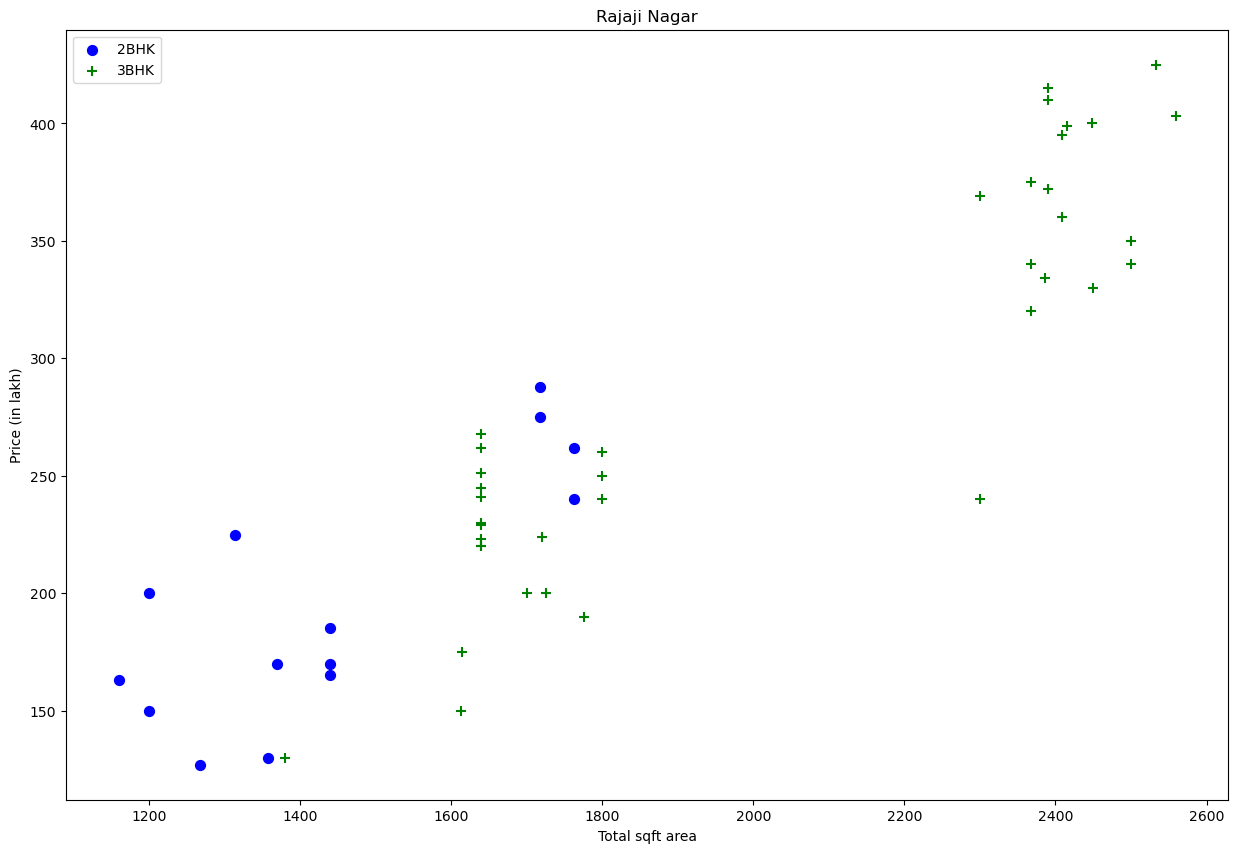

In [79]:
import matplotlib  # Import the matplotlib library
def scat_plot(df, location):
    # Filter data for 2 BHK and 3 BHK in the given location
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    # Set the size of the plot
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    # Scatter plot for 2 BHK
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2BHK', s=50)
    # Scatter plot for 3 BHK
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3BHK', s=50)
    # Set labels for x and y axes
    plt.xlabel("Total sqft area")
    plt.ylabel("Price (in lakh)")
    # Set the title of the plot
    plt.title(location)
    # Display legend
    plt.legend()
# Call the function with the desired location
scat_plot(df7, "Rajaji Nagar")


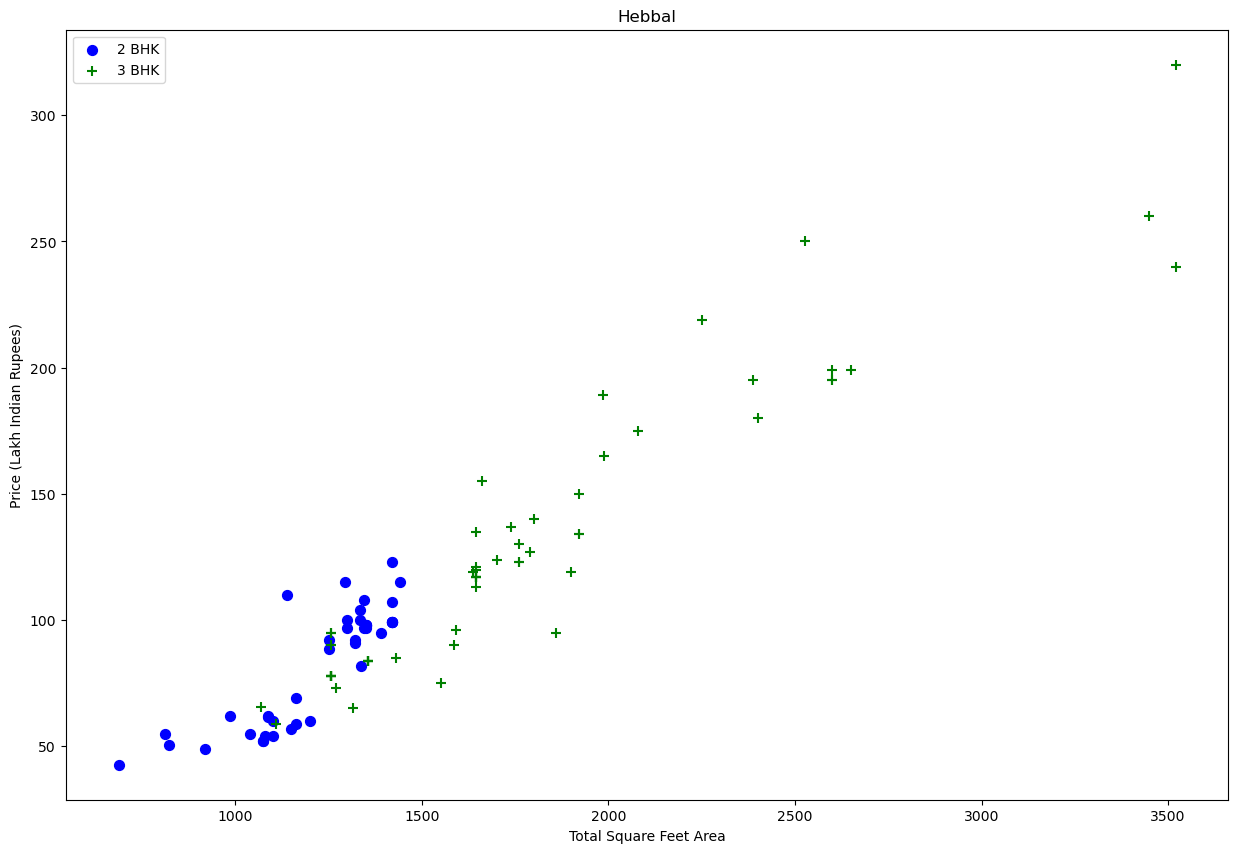

In [80]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Hebbal")

In [81]:
def remove_bhk_outliers(df):
    # Initialize an empty array to store indices of outliers
    exclude_indices = np.array([])
    
    # Iterate over each 'bhk' group in the current 'location'
    # Group the dataframe by the 'location' column
    for location, location_df in df.groupby('location'):
        # Initialize a dictionary to store statistics for each 'bhk' in the current 'location'
        bhk_stats = {}

        
        # Calculate mean, std, and count for each bhk in the current location
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        # Iterate through each bhk in the current location
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            
            # Check if stats are available for the previous bhk and the count is greater than 5
            if stats and stats['count'] > 5:
                # Exclude indices of data points where price_per_sqft is less than the mean of the previous bhk
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    
    # Drop the rows with the identified outlier indices
    return df.drop(exclude_indices, axis='index')

# Remove bhk outliers and assign the result to df8
df8 = remove_bhk_outliers(df7)

# Display the shape of the resulting DataFrame
# Comment the line below if you don't want to see the shape
df8.shape


# Explanation:

# Function Definition (def remove_bhk_outliers(df):):

# The function takes a DataFrame df as input.
# Initialize an empty array (exclude_indices = np.array([])):

# This array will be used to store the indices of rows identified as outliers.
# Group by 'location' (for location, location_df in df.groupby('location'):):

# Iterate over each unique location in the dataframe.
# Calculate Statistics (for bhk, bhk_df in location_df.groupby('bhk'):):

# For each 'bhk' group within the current 'location,' calculate mean, standard deviation, and count of 'price_per_sqft.'
# Identify Outliers (for bhk, bhk_df in location_df.groupby('bhk'):):

# Iterate over each 'bhk' group again and identify outliers by comparing 'price_per_sqft' with the mean of the previous 'bhk' if count is greater than 5.
# Drop Outliers (return df.drop(exclude_indices, axis='index')):

# Drop rows identified as outliers from the original dataframe.
# Create a New DataFrame (df8 = remove_bhk_outliers(df7)):

# Call the function on the original dataframe (df7) to create a new dataframe (df8) without outliers.
# Print DataFrame Shape (df8.shape):

# Print the shape of the resulting dataframe (df8).







(7317, 7)

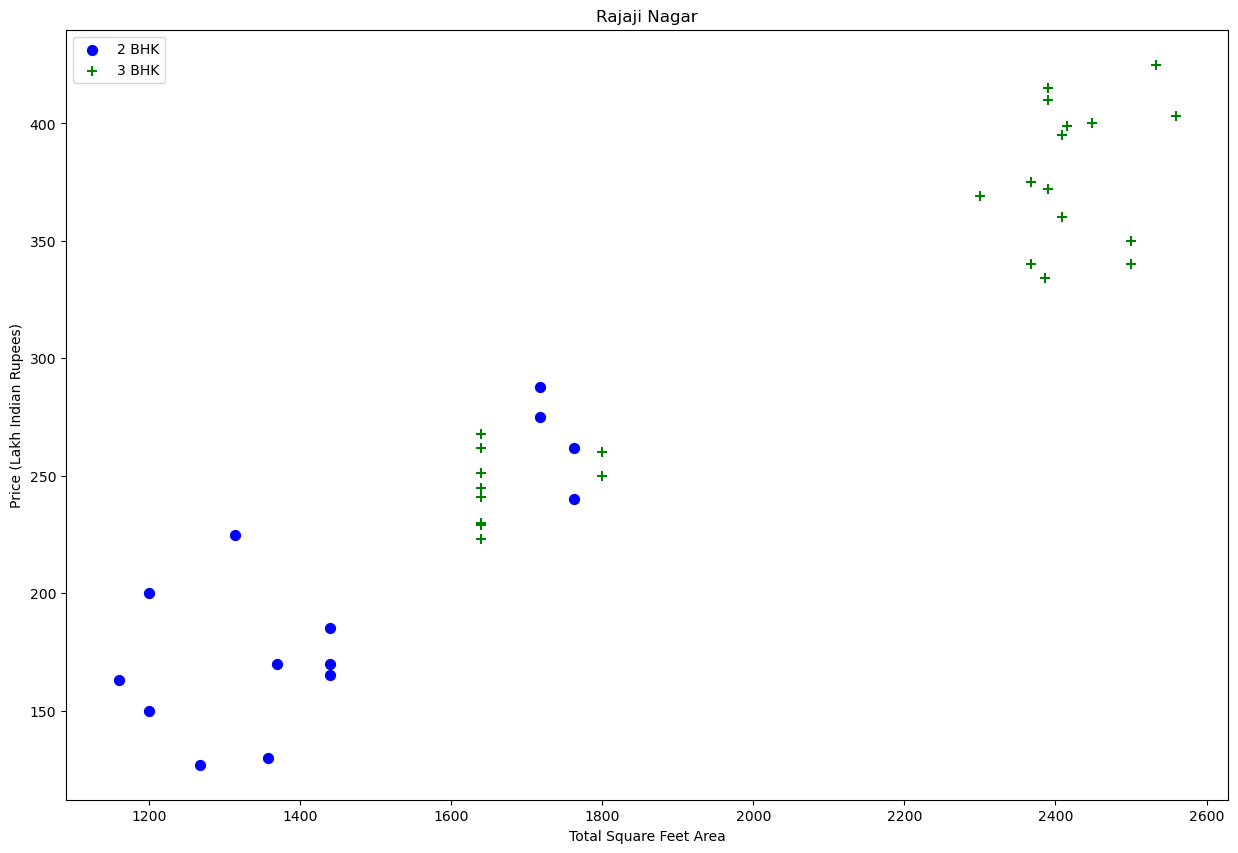

In [82]:
plot_scatter_chart(df8,"Rajaji Nagar")

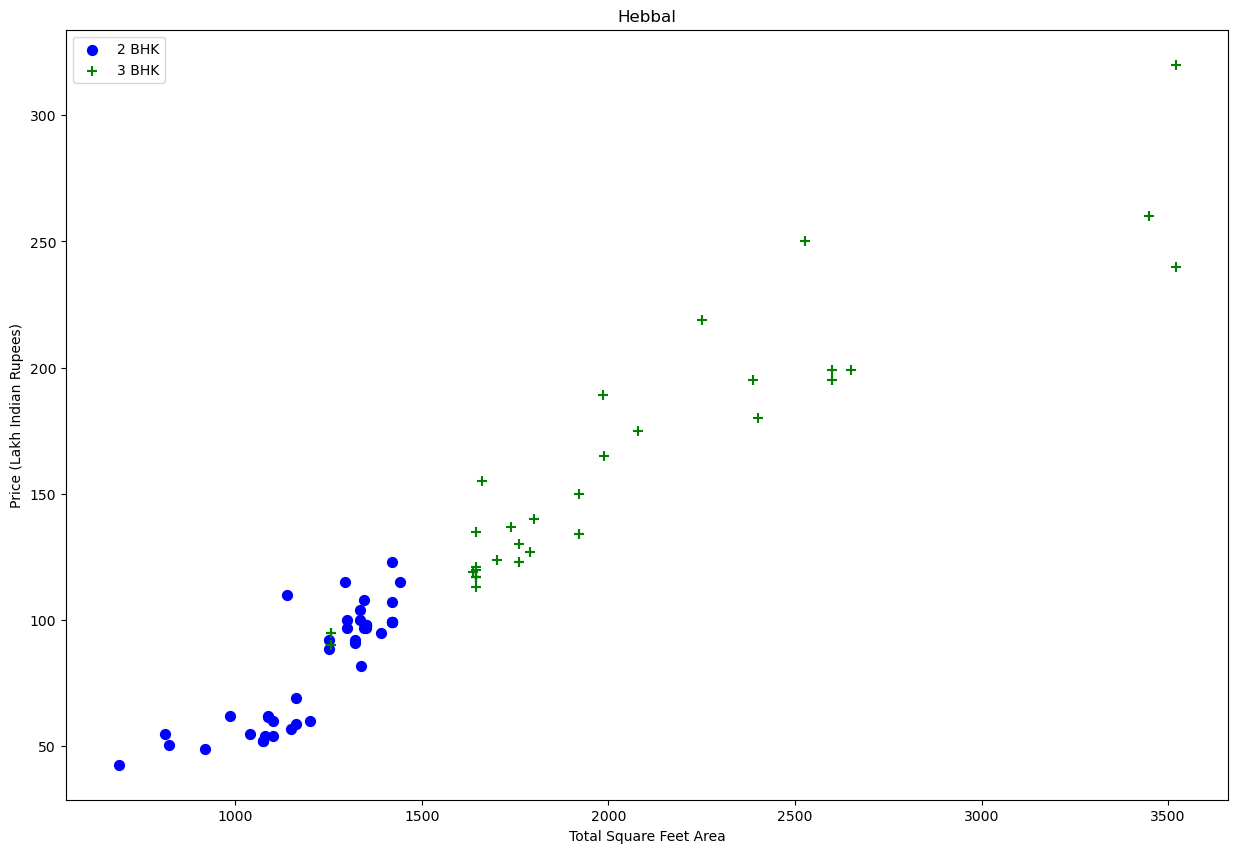

In [83]:
plot_scatter_chart(df8,"Hebbal")

#### Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function

### now i plot the histogram and now i want to see how many apartment and how many properties i have in per sqft area.

Text(0, 0.5, 'Count')

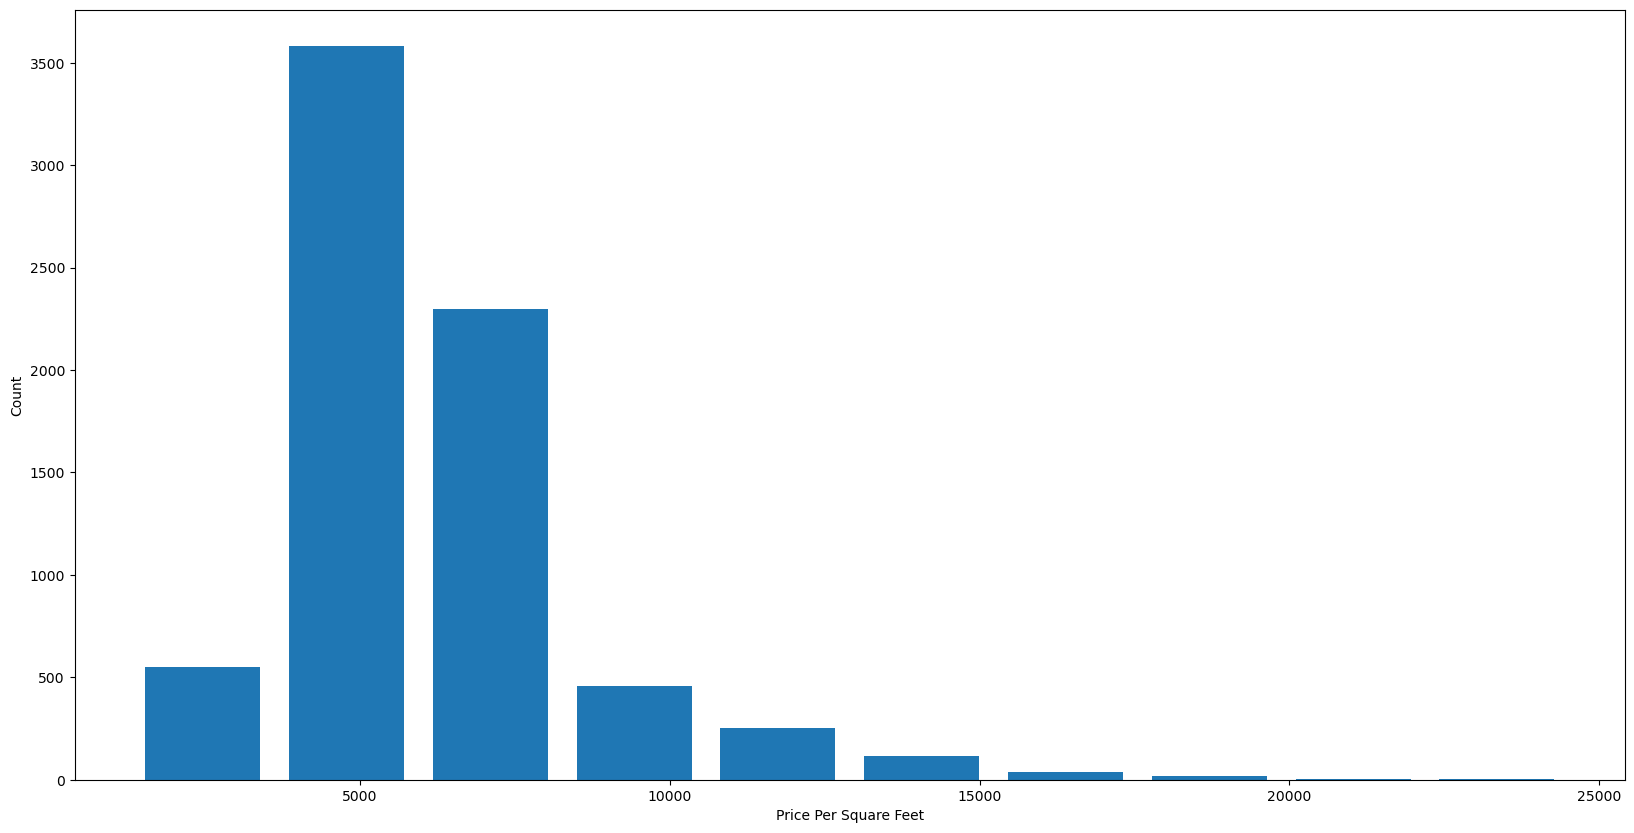

In [84]:
# Set the default figure size for Matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

# Create a histogram of the 'price_per_sqft' column in df8
# rwidth controls the width of the bars in the histogram
plt.hist(df8.price_per_sqft, rwidth=0.8)

# Set the label for the x-axis
plt.xlabel("Price Per Square Feet")

# Set the label for the y-axis
plt.ylabel("Count")


### this is bell curve or gaussian curve , proper shows a normal distribution

# Outlier Removal Using Bathrooms Feature

In [85]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

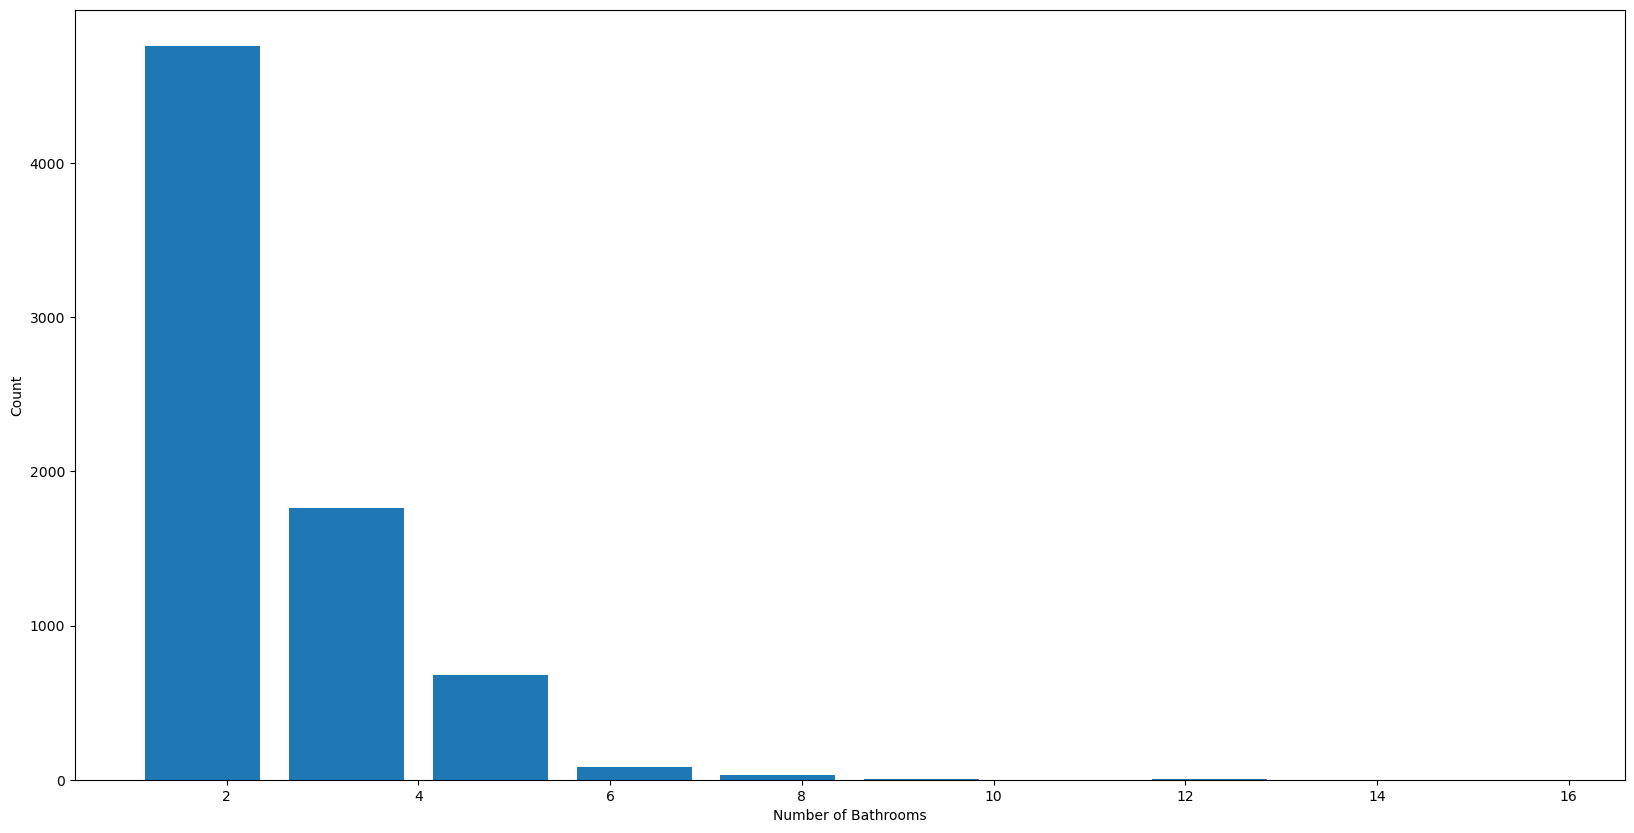

In [86]:
# Create a histogram of the 'bath' column in df8
# rwidth controls the width of the bars in the histogram
plt.hist(df8.bath, rwidth=0.8)

# Set the label for the x-axis
plt.xlabel("Number of Bathrooms")

# Set the label for the y-axis
plt.ylabel("Count")


In [87]:
df8[df8.bath>10]

location    size  total_sqft  bath  price  bhk  price_per_sqft
5277  Neeladri Nagar  10 BHK      4000.0  12.0  160.0   10     4000.000000
8483           other  10 BHK     12000.0  12.0  525.0   10     4375.000000
8572           other  16 BHK     10000.0  16.0  550.0   16     5500.000000
9306           other  11 BHK      6000.0  12.0  150.0   11     2500.000000
9637           other  13 BHK      5425.0  13.0  275.0   13     5069.124424

### It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [88]:
df8[df8.bath>df8.bhk+2]

location       size  total_sqft  bath   price  bhk  price_per_sqft
1626  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0    4     3252.032520
5238     Nagasandra  4 Bedroom      7000.0   8.0   450.0    4     6428.571429
6711    Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
8408          other      6 BHK     11338.0   9.0  1000.0    6     8819.897689

####  Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [89]:
# Filter rows in df8 where the number of bathrooms is less than the number of bedrooms + 2
df9 = df8[df8.bath < df8.bhk + 2]

# Display the shape of the resulting DataFrame
df9.shape


(7239, 7)

In [90]:
df9.head(2)

location   size  total_sqft  bath  price  bhk  price_per_sqft
0  1st Block Jayanagar  4 BHK      2850.0   4.0  428.0    4    15017.543860
1  1st Block Jayanagar  3 BHK      1630.0   3.0  194.0    3    11901.840491

In [91]:
# Drop UNNECESSARY DATA the 'size' and 'price_per_sqft' columns from df9 and create a new DataFrame df10
df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')

# Display the first 3 rows of the resulting DataFrame
df10.head(3)


location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3

# Use One Hot Encoding For Location

In [92]:
# # ML model canot interpret text data (location column)
# convert this text column(consist  categorical information) to numeric column/ information is to use ONE HOT ENCODING also called 
# # dumies 
# PANDAS DUMMIES METHOD here


#### pd.duumies function

In [93]:
dummies = pd.get_dummies(df10.location)
dummies

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                        1                   0                          0   
1                        1                   0                          0   
2                        1                   0                          0   
3                        1                   0                          0   
4                        1                   0                          0   
...                    ...                 ...                        ...   
10233                    0                   0                          0   
10234                    0                   0                          0   
10237                    0                   0                          0   
10238                    0                   0                          0   
10241                    0                   0                          0   

       2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                         0                     0                   0   
1                         0                     0                   0   
2                         0                     0                   0   
3                         0                     0                   0   
4                         0                     0                   0   
...                     ...                   ...                 ...   
10233                     0                     0                   0   
10234                     0                     0                   0   
10237                     0                     0                   0   
10238                     0                     0                   0   
10241                     0                     0                   0   

       6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                       0                   0                   0   
1                       0                   0                   0   
2                       0                   0                   0   
3                       0                   0                   0   
4                       0                   0                   0   
...                   ...                 ...                 ...   
10233                   0                   0                   0   
10234                   0                   0                   0   
10237                   0                   0                   0   
10238                   0                   0                   0   
10241                   0                   0                   0   

       9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                       0  ...                     0                   0   
1                       0  ...                     0                   0   
2                       0  ...                     0                   0   
3                       0  ...                     0                   0   
4                       0  ...                     0                   0   
...                   ...  ...                   ...                 ...   
10233                   0  ...                     0                   0   
10234                   0  ...                     0                   0   
10237                   0  ...                     0                   0   
10238                   0  ...                     0                   0   
10241                   0  ...                     0                   0   

       Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0                0           0               0          0                   0   
1                0           0               0          0                   0   
2                0           0               0          0                   0   
3                0           0               0          0                   0   
4                0           0               0          0 

In [94]:
dummies.head(3)

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                    1                   0                          0   
1                    1                   0                          0   
2                    1                   0                          0   

   2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   

   6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   

   9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                   0  ...                     0                   0   
1                   0  ...                     0                   0   
2                   0  ...                     0                   0   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0            0           0               0          0                   0   
1            0           0               0          0                   0   
2            0           0               0          0                   0   

   Yelenahalli  Yeshwanthpur  other  
0            0             0      0  
1            0             0      0  
2            0             0      0  

[3 rows x 241 columns]

In [95]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

location  total_sqft  bath  price  bhk  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                    1   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                    1   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                    1   
3  1st Block Jayanagar      1200.0   2.0  130.0    3                    1   
4  1st Block Jayanagar      1235.0   2.0  148.0    2                    1   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 245 columns]

In [96]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                    1                   0   
1      1630.0   3.0  194.0    3                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                   0  ...            0                     0   
1                   0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  

[2 rows x 244 columns]

# Build a Model Now..

In [98]:
df12.shape

(7239, 244)

In [99]:
X = df12.drop(['price'],axis='columns')
X.head(3) # x CONTAIN ONLY INDEPENDENT VARIABLE

total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0    4                    1                   0   
1      1630.0   3.0    3                    1                   0   
2      1875.0   2.0    3                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0                   0                   0  ...            0   
1                   0                   0  ...            0   
2                   0                   0  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
1                     0                   0            0           0   
2                     0                   0            0           0   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               0          0                   0            0             0  
1               0          0                   0            0             0  
2               0          0                   0            0             0  

[3 rows x 243 columns]

In [100]:
X.shape

(7239, 243)

In [101]:
y = df12.price # DEPENDENT VARIABLE
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [102]:
len(y)

7239

In [108]:
# Importing the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X is the feature matrix (input variables), and y is the target variable (output)
# test_size=0.2 specifies that 20% of the data will be used for testing, and 80% for training
# random_state=10 sets a seed for the random number generator, ensuring reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [112]:
from sklearn.linear_model import LinearRegression  # Importing the LinearRegression class from scikit-learn
lr_clf = LinearRegression()  # Creating an instance of the LinearRegression class, which represents the linear regression model
lr_clf.fit(X_train, y_train)  # Training the linear regression model with the training data (X_train features and y_train target values)
lr_clf.score(X_test, y_test)  # Calculating the coefficient of determination (R^2) on the test data to evaluate the model's performance


0.8629132245229443

# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [111]:
# Importing necessary libraries
from sklearn.model_selection import ShuffleSplit  # Importing ShuffleSplit for random train/test splits
from sklearn.model_selection import cross_val_score  # Importing cross_val_score for cross-validation
from sklearn.linear_model import LinearRegression  # Importing LinearRegression model from scikit-learn

# Creating a ShuffleSplit cross-validation object
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

# Find best model using GridSearchCV

In [114]:
# Importing necessary libraries
from sklearn.model_selection import GridSearchCV  # GridSearchCV for hyperparameter tuning
from sklearn.linear_model import Lasso  # Lasso regression model
from sklearn.tree import DecisionTreeRegressor  # Decision Tree regression model

# Defining a function to find the best model using GridSearchCV
def find_best_model_using_gridsearchcv(X, y):
    # Dictionary containing different algorithms/models and their respective hyperparameter grids
    algos = {
        'linear_regression': {
            'model': LinearRegression(),  # Linear Regression model
            'params': {
                'normalize': [True, False]  # Hyperparameter options for normalization
            }
        },
        'lasso': {
            'model': Lasso(),  # Lasso regression model
            'params': {
                'alpha': [1, 2],  # Hyperparameter options for alpha (regularization strength)
                'selection': ['random', 'cyclic']  # Hyperparameter options for selection method
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),  # Decision Tree regression model
            'params': {
                'criterion': ['mse', 'friedman_mse'],  # Hyperparameter options for criterion
                'splitter': ['best', 'random']  # Hyperparameter options for splitter
            }
        }
    }

    # Empty list to store results for each model
    scores = []

    # Creating a ShuffleSplit cross-validation object
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    # Looping through each algorithm in the dictionary
    for algo_name, config in algos.items():
        # Creating a GridSearchCV object for the current algorithm
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)

        # Fitting the GridSearchCV object to the data
        gs.fit(X, y)

        # Appending results to the scores list
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    # Creating a DataFrame from the list of scores
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Calling the function with input data X and target variable y
find_best_model_using_gridsearchcv(X, y)


C:\Users\Hritik Sachan\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Hritik Sachan\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_p

model  best_score  \
0  linear_regression    0.847796   
1              lasso    0.726754   
2      decision_tree    0.714705   

                                         best_params  
0                               {'normalize': False}  
1                {'alpha': 2, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'splitter': 'best'}

# Test the model for few properties

In [116]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [117]:
# if i want to known the location of the '2nd Phase Judicial Layout'
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

5

In [118]:
np.where(X.columns=='Vishveshwarya Layout')[0][0]

234

In [119]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [120]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\Hritik Sachan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.86570258312184

In [126]:
predict_price('1st Phase JP Nagar',1000, 2, 3)

C:\Users\Hritik Sachan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.36367614310157

In [122]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\Hritik Sachan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.31197733179866

In [123]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\Hritik Sachan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


195.52689759854638

# Export the tested model to a pickle file

In [124]:
# Importing the 'pickle' module for object serialization
import pickle

# Opening a file named 'banglore_home_prices_model.pickle' in binary write mode ('wb')
with open('banglore_home_prices_model.pickle', 'wb') as f:
    # Dumping the 'lr_clf' (presumably a linear regression model) into the file 'f'
    pickle.dump(lr_clf, f)


# Export location and column information to a file that will be useful later on in our prediction application

In [125]:
# Importing the json module for working with JSON data
import json

# Creating a dictionary 'columns' with a key 'data_columns' and a list comprehension to convert column names to lowercase
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

# Opening a file named "columns.json" in write mode ('w')
with open("columns.json", "w") as f:
    # Writing the JSON representation of the 'columns' dictionary to the file
    f.write(json.dumps(columns))
